In [50]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

from heat_exchanger import build_heat_exchanger
from constants import *

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams['figure.facecolor'] = 'white'

In [51]:
HX1 = build_heat_exchanger([6], [6], 0.3, Side.OPPOSITE, Pattern.TRIANGLE)
HX2 = build_heat_exchanger([6,6], [6], 0.3, Side.OPPOSITE, Pattern.TRIANGLE)
HX3 = build_heat_exchanger([6,6,6], [6], 0.3, Side.OPPOSITE, Pattern.TRIANGLE)
HX4 = build_heat_exchanger([6,6], [6,6], 0.3, Side.OPPOSITE, Pattern.TRIANGLE)
HX5 = build_heat_exchanger([6,6,6,6], [6,6], 0.3, Side.OPPOSITE, Pattern.TRIANGLE)

HX = [HX1, HX2, HX3, HX4, HX5]
for hx in HX:
    hx.set_conditions([20, 60])
    

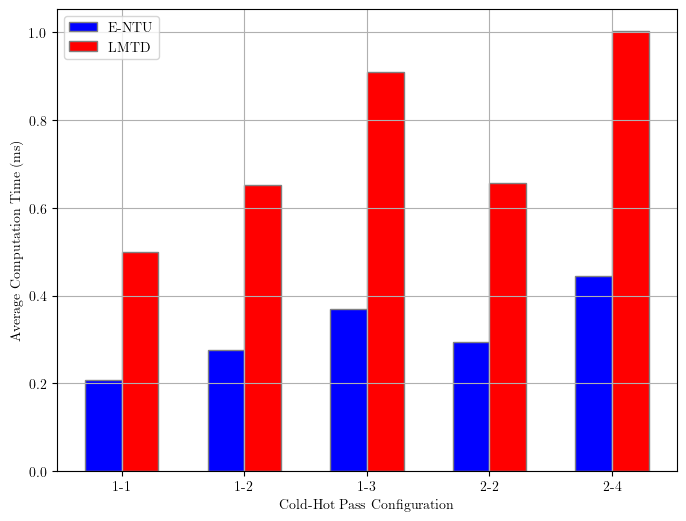

In [52]:

def time_ntu_lmtd(heat_exchanger):
    T_entu = timeit.timeit(lambda: heat_exchanger.compute_effectiveness(method = "E_NTU"), number=1000)
    Qdot_entu = heat_exchanger.Qdot
    T_lmtd = timeit.timeit(lambda: heat_exchanger.compute_effectiveness(method = "LMTD"), number=1000)
    Qdot_lmtd = heat_exchanger.Qdot
    assert np.isclose(Qdot_entu, Qdot_lmtd)

    return T_entu, T_lmtd


# create barchart
fig, ax = plt.subplots()
barWidth = 0.3

bars1 = []
bars2 = []

for i,hx in enumerate(HX):
    T_entu, T_lmtd = time_ntu_lmtd(hx)
    bars1.append(T_entu)
    bars2.append(T_lmtd)

r1 = np.arange(len(bars1))

plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='grey', label='E-NTU')
plt.bar(r1 + barWidth, bars2, color='red', width=barWidth, edgecolor='grey', label='LMTD')

plt.xlabel('Cold-Hot Pass Configuration', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(len(bars1))], ['1-1', '1-2', '1-3', '2-2', '2-4'])
plt.ylabel('Average Computation Time (ms)', fontweight='bold')

plt.legend()
plt.grid()

plt.savefig("entu_lmtd_speed", dpi = 300)